# Single Graph Agent Using LangGraph

In [1]:
pip install langgraph langsmith

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install langchain langchain_groq langchain_community

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of langchain-groq to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: langchain_groq
    Found existing installation: langchain-groq 0.3.8
    Uninstalling langchain-groq-0.3.8:
      Successfully uninstalled langchain-groq-0.3.8
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
groq_api_key='enter your api key'
langsmith='Enter your langsmith key'

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001FED3FC42F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001FED3FC5010>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node("chatbot",chatbot)

In [11]:
graph_builder

In [12]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [13]:
graph=graph_builder.compile()

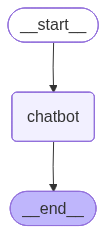

In [14]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass 

In [15]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Andhra Pradesh is divided into 26 districts. Here is the list of districts in Andhra Pradesh:\n\n1. Anantapur\n2. Annamayya\n3. Chittoor\n4. East Godavari\n5. Eluru\n6. Guntur\n7. Kadapa\n8. Kakinada\n9. Konaseema\n10. Kurnool\n11. Krishna\n12. Nandyal\n13. NTR District (formerly Vijayawada)\n14. Alluri Sitharama Raju\n15. Anakapalli\n16. Bapatla\n17. Dr. B.R. Ambedkar Konaseema\n18. Eluru\n19. Guntur\n20. Kakinada\n21. Krishna\n22. Nellore\n23. Palnadu\n24. Parvathipuram Manyam\n25. Prakasam\n26. Sri Sathya Sai\n\nNote: The list of districts in Andhra Pradesh has changed over time due to reorganization and creation of new districts. The above list reflects the current 26 districts in the state.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 236, 'prompt_tokens': 48, 'total_tokens': 284, 'completion_time': 0.704397449, 'completion_tokens_details': None, 'prompt_time': 0.002226342, 'prompt_tokens_details': Non